<a href="https://colab.research.google.com/github/QiaoYanJoey/QiaoYanJoey.github.io/blob/main/cee690_hw4_template_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

CEE 690: Machine Learning and Data Science, Fall 2023

Homework 4: 100 Total Points

Due: November 8th by 11:59 PM

Submissions required electronically through Sakai **as an HTML and
as an .ipynb**


A pdf of the homework assignment can be found on Sakai. Please make your own copy of this notebook template and record each answer in it. When you have completed the assignment, save this notebook as an HTML and submit it to Sakai.   

Note that partial credit for incorrect answers is difficult to grant if you do not show your work and comment your code.

# Imports and Setup

In [1]:
import nbconvert
import numpy as np
...

Ellipsis

### (Colab specific) Mount your drive

We need to mount Google Drive. This will allow us to import our own modules (from .py files) and to access data (.csv files, etc) on our google drive.

**Run** the next cell to start the mount process. Click on the link that it prints.

You will receive a Google account sign-in prompt. If you have multiple Google accounts (e.g. Duke and personal), make sure to **sign into the same account** that you have the template saved in.

You will need to grant Colab permissions.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Make sure the above output you receive says,

```
Mounted at /content/drive
```
instead of an error message.



### (Colab specific) Adding the path to files

You will need to add this template's path in your Google Drive to the python path.

Click on File$\rightarrow$Locate in Drive, and take a look at where you have saved the template.  You'll need to click on any `...` to see intermediate folders for the full directory structure to get the explicit path.

**Replace the definition** of `GOOGLE_PATH_AFTER_MYDRIVE` below with yours.

In [3]:
import os            ##  This module is for "operating system" interfaces
import sys           ##  This module is for functionality relevant to the python run time

GOOGLE_PATH_AFTER_MYDRIVE = 'CEE690'
GOOGLE_DRIVE_PATH = os.path.join('drive','My Drive', GOOGLE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Append the directory path of this notebook to what python easily "sees"
sys.path.append(GOOGLE_DRIVE_PATH)

# Make your current working directory the directory path of this notebookand data
os.chdir(GOOGLE_DRIVE_PATH)

['hw3_physio.csv', 'cee690_hw3_template.ipynb', 'cee60_hw4_q4', 'lecture_deep_learning_part1.ipynb', 'lecture_deep_learning_part2.ipynb', 'xor_decision_tree', 'xor_decision_tree.pdf', 'cee690_hw4_template-1.ipynb', 'datasets']


The above should have printed out a list corresponding to the files that you uploaded to the same google drive folder as this .ipynb file.


Note - if you run the cell above repeatedly without restarting the runtime (e.g. Runtime --> Restart and Run all), you will end up re-appending to the path name and will change directory to a non-existent path.

You will then end up with a

```
FileNotFoundError
```



# Problem 1: Capturing Non-Linearities (20 points)


## Part a

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

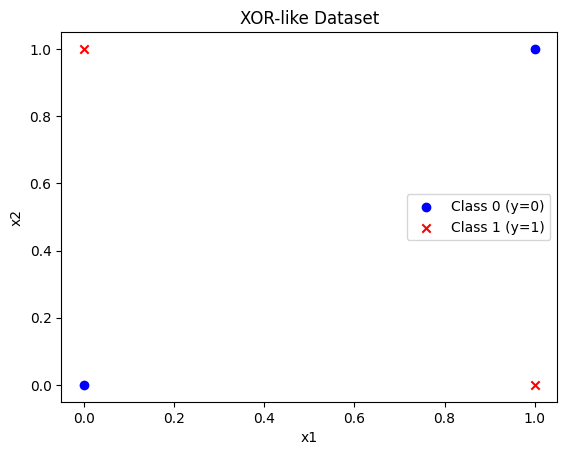

In [5]:
# Define the XOR-like dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Separate the data points based on their class labels
class_0 = X[y == 0]
class_1 = X[y == 1]

# Create a scatterplot for each class
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x', label='Class 1 (y=1)')

# Set labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='right')

# Show the plot
plt.title('XOR-like Dataset')
plt.show()

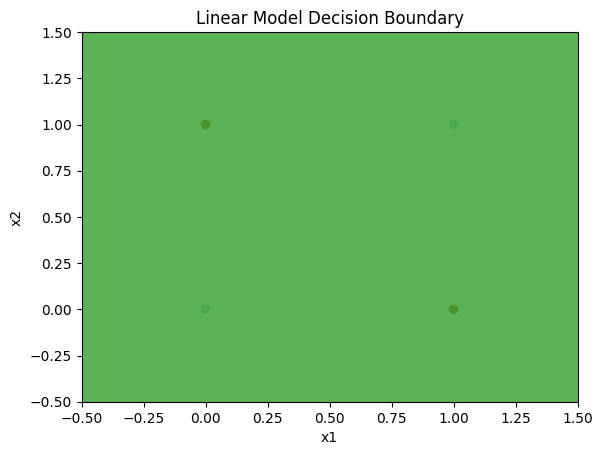

In [6]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Generate a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 500), np.linspace(-0.5, 1.5, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatterplot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Set plot limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x1')
plt.ylabel('x2')

# Show the plot
plt.title('Linear Model Decision Boundary')
plt.show()

* Analysis: From the scatter plot of XOR data points, we could see that XOR is not linearly separable because there is no straight line that can separate the positive outcomes from the negative outcomes. Linear models, such as linear regression, can only create linear decision boundaries, which are not sufficient to accurately classify XOR data.


## Part b

                 Inputs
            /             \
       x1 < 0              x1 > 0
      /      \           /      \
    x2 < 0   x2 > 0   x2 < 0  x2 > 0
    /          \        /          \
    y < 0     y > 0   y > 0     y < 0


* Analysis: From this figure, we could see that decision tree is a good model.

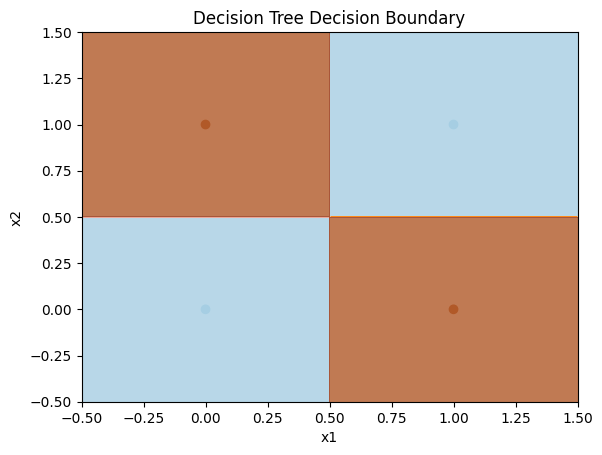

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define the XOR-like dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Fit the model to the data
model.fit(X, y)

# Generate a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 500), np.linspace(-0.5, 1.5, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatterplot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Set plot limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('x1')
plt.ylabel('x2')

# Show the plot
plt.title('Decision Tree Decision Boundary')
plt.show()

## Part c

* Both kNN and Kernel SVM are machine learning algorithms that can capture non-linear relationships. XOR is non-liner relationship.

* kNN: The algorithm computes distances between data points and selects the k-nearest data points to make a prediction. kNN can effectively capture the XOR because when set the appropriate value of k, it can adapt to the local structure of the data. In the XOR case, setting k=1 would allow kNN to classify each point based on its immediate neighbors, effectively capturing the non-linear decision boundary.

* SVM: It uses a kernel function to map the data into a higher-dimensional space where it can find a linear separator. SVM can capture XOR by using an appropriate kernel function that can implicitly maps the data into a high-dimensional space where it can find a non-linear decision boundary.

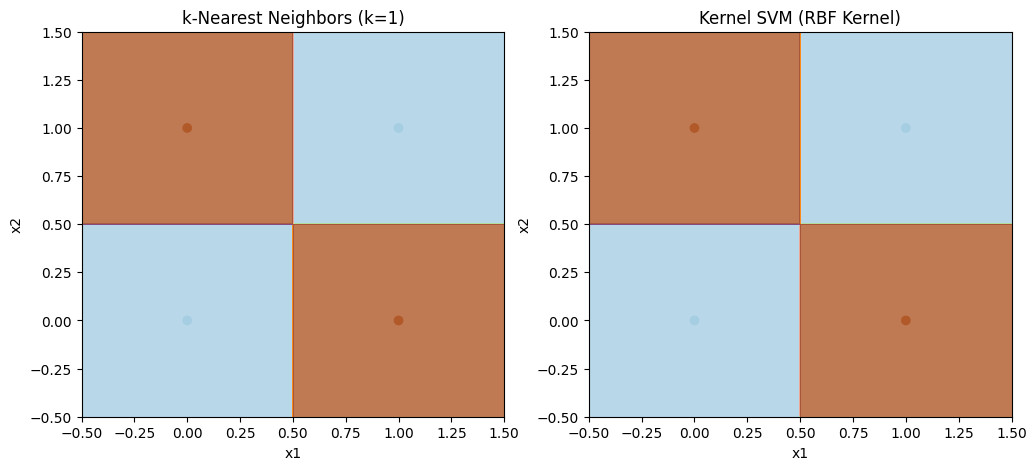

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define the XOR-like dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a k-Nearest Neighbors (kNN) model with k=1
knn_model = KNeighborsClassifier(n_neighbors=1)

# Fit the kNN model to the data
knn_model.fit(X, y)

# Create a Kernel SVM model with an RBF kernel
svm_model = SVC(kernel='rbf')

# Fit the SVM model to the data
svm_model.fit(X, y)

# Generate a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 500), np.linspace(-0.5, 1.5, 500))
Z_knn = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Create subplots for kNN and SVM
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot kNN decision boundary
axes[0].contourf(xx, yy, Z_knn, cmap=plt.cm.Paired, alpha=0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())
axes[0].set_title('k-Nearest Neighbors (k=1)')

# Plot SVM decision boundary
axes[1].contourf(xx, yy, Z_svm, cmap=plt.cm.Paired, alpha=0.8)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())
axes[1].set_title('Kernel SVM (RBF Kernel)')

# Set common labels
for ax in axes:
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.show()


## Part d

* Input Layer: Assume an input layer with 2 nodes that represent the 2 input features in the XOR (<0/ >0).

* Hidden Layers: 2 hidden layers.In the 1st hidden layer, each neuron receives weighted inputs from both input features. The first hidden neuron could learn to fire strongly  when both inputs are alike (either <0, <0 or >0, >0), and the second hidden neuron could do the opposite—it could fire strongly when the inputs are different (either <0, >0 or >0, <0).

* Output Layer: a single output node, also using a sigmoid function for activation. The output layer neuron takes the outputs from the hidden layer, applies its own weights and bias, and uses another sigmoid function to determine the final output. It can learn to output a high value if it detects that the hidden layer's output corresponds to the XOR function's 'true' output, and a low value otherwise.

# Problem 2: Performing deep learning by hand (20 points)

## Part a

Input features (X) = [0.6, 0.2, 0.8, 0.1]

Hidden layer weights:

[[0.2, 0.4, 0.1, 0.3],

[0.3, 0.1, 0.2, 0.5],

[0.5, 0.2, 0.3, 0.4]]

Hidden layer biases = [0.1, 0.2, 0.3]




1. Multiply the input vector by the weights of the hidden layer:

* the first neuron in the hidden layer (H1):

 H1 = (0.6 * 0.2) + (0.2 * 0.4) + (0.8 * 0.1) + (0.1 * 0.3) = 0.12 + 0.08 + 0.08 + 0.03 = 0.31

* the second neuron in the hidden layer (H2):

 H2 = (0.6 * 0.3) + (0.2 * 0.1) + (0.8 * 0.2) + (0.1 * 0.5) = 0.18 + 0.02 + 0.16 + 0.05 = 0.41

* the third neuron in the hidden layer (H3):

 H3 = (0.6 * 0.5) + (0.2 * 0.2) + (0.8 * 0.3) + (0.1 * 0.4) = 0.3 + 0.04 + 0.24 + 0.04 = 0.62


2. Add the bias terms for the hidden layer:

 H1 = H1 + 0.1 = 0.31 + 0.1 = 0.41

 H2 = H2 + 0.2 = 0.41 + 0.2 = 0.61

 H3 = H3 + 0.3 = 0.62 + 0.3 = 0.92

3. Apply the ReLU activation function to each component of the result:

* For ReLU activation, if the value is less than zero, it becomes zero; otherwise, it remains the same:

 H1 = max(0, 0.41) = 0.41

 H2 = max(0, 0.61) = 0.61

 H3 = max(0, 0.92) = 0.92

4. So, the output from the hidden layer H is a vector with 3 components:

 [0.41, 0.61, 0.92].


## Part b

* Non-linearity: Without non-linear activation functions like ReLU, the entire network would effectively collapse into a linear model, making it incapable of learning intricate patterns in the data.

* Simplicity and Efficiency: The ReLU activation function is computationally efficient to evaluate. If the input is positive, it is passed through unchanged; if it is negative, it is set to zero. This simplicity makes training deep neural networks more practical and faster than others.

## Part c

Increasing the number of neurons in the hidden layer generally increases the model's capacity. It can capture more complex and intricate patterns in the training data. It can also lead to overfitting, especially when there is limited training data. Also, it will produce more complex and less interpretable representations, making it harder to extract insights from the model.

Conversely, a smaller hidden layer reduces the model's capacity to represent complex patterns. When there is limited training data, it can help prevent overfitting. We could also have simpler and more interpretable representations

## Part d

1. Multiply the output from the hidden layer by the weights:

 Y = (0.41 * 0.3) + (0.61 * 0.5) + (0.92 * 0.2) = 0.123 + 0.305 + 0.184 = 0.612

2. Add the bias term for the output neuron:

 Y = Y + 0.1 = 0.612 + 0.1 = 0.712

3. Apply the linear activation function:

 The linear activation function simply returns the input value as the output.

 So, the output from the output neuron Y is a single number, which is 0.712.

# Problem 3: Using PyTorch on MNIST (30 Points)

Code to access the MNIST dataset

In [10]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part a

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.nn as nn

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [16]:
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)

## Training
epochs=5

# Instantiate model
model = MNIST_Logistic_Regression()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatchs
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part b

In [20]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(128, 10)   # Second layer input 128 (hidden layer size), output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part c

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(128, 64)   # Second layer input 128, output 64 (hidden layer size)
        self.fc3 = nn.Linear(64, 10)    # Third layer input 64, output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the first hidden layer
        x = F.relu(self.fc2(x))  # Applying ReLU activation function to the second hidden layer
        x = self.fc3(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatches
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        # Backward pass
        loss.backward()
        optimizer.step()


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part d

### Logistic regression network

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)

## Training
epochs=5

# Instantiate model
model = MNIST_Logistic_Regression()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatchs
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.91839998960495


#### The test accuracy of logistic regression network is ~91.8%.

#### It matches the reported accuracies.

 ### MLP with a single hidden layer

In [30]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(128, 10)   # Second layer input 128 (hidden layer size), output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()
# Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatches
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        x = images.view(images.shape[0], -1)
        # Forward pass
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9577000141143799


#### The test accuracy of MLP with a single hidden layer is ~95.8%.

#### It matches the reported accuracies.

### MLP with two hidden layers

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatches
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

# Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatches
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        x = images.view(images.shape[0], -1)
        # Forward pass
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9652000069618225


#### The test accuracy of MLP with two hidden layers is ~96.5%.

#### It matches the reported accuracies.

### MLP with a single hidden layer (different number of nodes)

In [33]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9597


#### The test accuracy of MLP with a single hidden layer but with different nodes is ~96%
#### It is a litter higher than the previous one (~95.8%).
#### So the accuracy changes with nodes but doesn't change a lot.

#### It still matches the reported accuracies.

### MLP with two hidden layers (different number of nodes)

In [34]:
# Define the MLP with two hidden layers
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 510)
        self.fc2 = nn.Linear(510, 250)
        self.fc3 = nn.Linear(250, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation function after first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation function after second hidden layer
        x = self.fc3(x)          # Output layer, no activation here (it will be included in the loss)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9699


#### The test accuracy of MLP with two hidden layers but with different nodes is ~97%
#### It is a litter higher than the previous one (~96.5%).
#### So the accuracy changes with nodes but doesn't change a lot.

#### It still matches the reported accuracies.

# Problem 4:  AlexNet the deep learning firefighter (25 points)


## Part a

In [4]:
import imageio
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
import torchvision.models as models
import os
from tqdm.notebook import tqdm, trange
import PIL
%matplotlib inline
import torchvision
from PIL import Image
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader

<ipython-input-5-8ee0a0293de1>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/fire/' + fire_ims[0]))
<ipython-input-5-8ee0a0293de1>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/nofire/' + nofire_ims[0]))


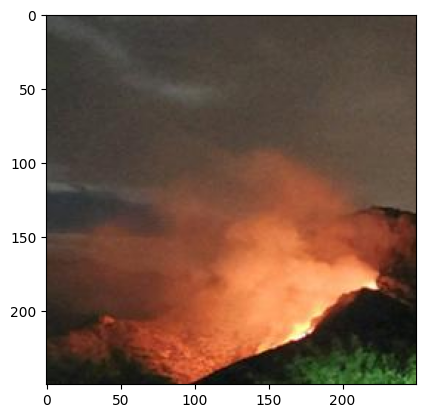

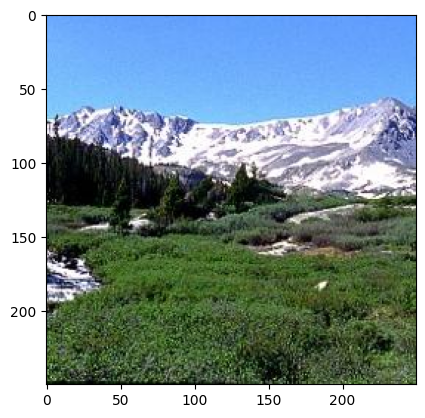

In [5]:
fire_ims = os.listdir('./cee60_hw4_q4/Testing/fire/')
nofire_ims = os.listdir('./cee60_hw4_q4/Testing/nofire/')
plt.figure()
plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/fire/' + fire_ims[0]))
plt.figure()
plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/nofire/' + nofire_ims[0]))
plt.show()

## Part b

Set up data augmentation

In [6]:
data_transforms_test = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [7]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Set up data loader

In [8]:
train_data = datasets.ImageFolder('./cee60_hw4_q4/Testing/', transform=data_transforms)
test_data = datasets.ImageFolder('./cee60_hw4_q4/Training and Validation/', transform=data_transforms_test)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False,num_workers=0)

## Part c

In [9]:
model = models.alexnet()

model_ft = models.alexnet(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device) #send the model to the gpu if we have one

# summary(model_ft,train_loader.__iter__().next()[0].shape[1:])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model_ft

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [11]:
num_ftrs = model_ft.classifier[-1].in_features # Need to know the number of features
# coming out of the penultimate layer
model_ft.classifier[-1] = nn.Linear(num_ftrs, 1)

model_ft = model_ft.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_ft.parameters(), lr=1e-5, momentum=0.9)

In [12]:
def train_model(model, criterion, optimizer, num_epochs=25):
    for epoch in trange(num_epochs):
        correct = 0
        total = len(train_data)
        for images, labels in tqdm(train_loader):

            inputs = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # Do the forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            predictions = torch.round(torch.sigmoid(outputs)).long()#torch.argmax(y, dim=1)
            correct += torch.sum((predictions == labels).float())

            # Calculate gradients and step
            loss.backward()
            optimizer.step()
        test_model()

        print('Train accuracy:{}'.format(correct/total))

        model_ft.train() # set model back to training mode (batch norm layers back to normal) after testing

In [13]:
def test_model():
    ## Testing
    correct = 0
    total = len(test_data)
    model.eval() # set the model into evaluation mode, which changes the
    # behavior of the batch norm layer so that it is not sensitive to batch size
    with torch.no_grad():
        # Iterate through test set minibatchs
        for images, labels in tqdm(test_loader):
            # Forward pass
            inputs = images.to(device)
            labels = labels.unsqueeze(1).to(device)
            y = model_ft(inputs)

            predictions = torch.round(torch.sigmoid(y)).long()#torch.argmax(y, dim=1)
            correct += torch.sum((predictions == labels).float())
    print('Test accuracy: {}'.format(correct/total))

In [14]:
train_model(model_ft, criterion, optimizer, num_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.6462882161140442
Train accuracy:0.44117647409439087


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.7079694271087646
Train accuracy:0.4852941036224365


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.7587336301803589
Train accuracy:0.6029411554336548


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8040392994880676
Train accuracy:0.6617646813392639


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8384279608726501
Train accuracy:0.8382353186607361


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8422489166259766
Train accuracy:0.9264705777168274


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8668122291564941
Train accuracy:0.8970588445663452


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8820960521697998
Train accuracy:0.9558823704719543


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8711790442466736
Train accuracy:0.8823529481887817


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.8891921639442444
Train accuracy:0.9558823704719543


## Part d

In [17]:
model_ft = models.alexnet(pretrained=False)
num_ftrs = model_ft.classifier[-1].in_features # Need to know the number of features
# coming out of the penultimate layer
model_ft.classifier[-1] = nn.Linear(num_ftrs, 1)
model_ft = model_ft.to(device)
optimizer = torch.optim.SGD(model_ft.parameters(), lr=1e-5, momentum=0.9)

In [18]:
train_model(model_ft, criterion, optimizer, num_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.44159388542175293
Train accuracy:0.47058823704719543


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4443231523036957
Train accuracy:0.5735294222831726


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4372270703315735
Train accuracy:0.5588235259056091


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.45087337493896484
Train accuracy:0.5147058963775635


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4497816562652588
Train accuracy:0.6176470518112183


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4465065598487854
Train accuracy:0.6176470518112183


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4263100326061249
Train accuracy:0.5441176295280457


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.45305678248405457
Train accuracy:0.6029411554336548


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.4459607005119324
Train accuracy:0.5882353186607361


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

Test accuracy: 0.44541484117507935
Train accuracy:0.5882353186607361


## Part e

* After compared them, I find the train and test accuracy with transfer learning is much higher than that of without transfer learning. It is a common result and generally a positive outcome.

* The test accuracy with transfer learning is ~80% and the train accuracy is ~85%. A high train accuracy suggests that the model has learned the training data well. However, the slightly lower test accuracy compared to the train accuracy could suggest some overfitting.

* The test accuracy with out transfer learning is ~43% and the train accuracy is ~55%. This test accuracy level is not very high and indicates that the model is not generalizing well to new, unseen data. For the train accuracy, While it's better than random guessing, it's still relatively low for many machine learning tasks.

* Transfer learning leverages a pre-trained model (AlexNet) and by using these pre-trained features, model can focus more on learning the task-specific features. This accelerateσ learning and result in better performance.

*  Τhe pre-trained model has learned valuable patterns from a broader dataset, it's better equipped to handle a wider range of inputs and variations, then have a better performance.

# Pseudo-Problem 5: Administrative (5 Points):

## Part a

25h

## Part b

I adhered to the Duke Community Standard in the completion of this
assignment.

## Part c

I adhered to the Class AI
Policy in the completion of this assignment.

# Convert file to HTML

To generate your HTML file to submit on Sakai, run the following cells with the correct file path.

In [4]:
# If you are working in Colab, use this path to convert.
print(GOOGLE_DRIVE_PATH)

# Otherwise, use the filepath on your computer where this template is saved

drive/My Drive/CEE690


In [5]:
!jupyter nbconvert --to html "/content/drive/MyDrive/CEE690/hw4_QiaoYan.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/CEE690/hw4_QiaoYan.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.